EXERCICIO 4

In [98]:
import numpy as np
import matplotlib.pyplot as plt

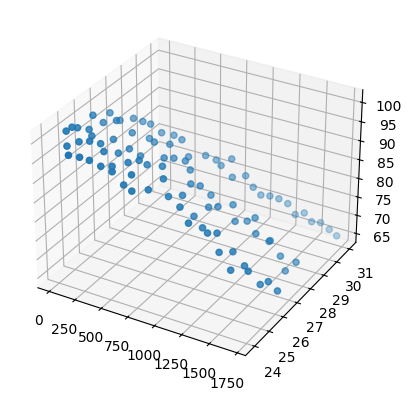

In [99]:
# A

arq = np.load('ex4.npz')
cycle = arq['cycle']
temperature = arq['temperature']
capacity = arq['capacity']

id = np.argsort(capacity)
capacity = capacity[id]
cycle = cycle[id]
temperature = temperature[id]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cycle, temperature, capacity)
plt.show()


A = np.ones((97, 6))
A[:, 1] = cycle
A[:, 2] = temperature
A[:, 3] = cycle ** 2
A[:, 4] = temperature ** 2
A[:, 5] = cycle * temperature



In [100]:
# B

coef = np.linalg.lstsq(A, capacity, rcond=0)[0]

f = lambda cycle, temperature: coef[0] + cycle * coef[1] + temperature * coef[2] + (cycle ** 2) * coef[3] + (temperature ** 2) * coef[4] + cycle * temperature * coef[5] 

f = np.vectorize(f)

print(coef)

rms = np.sqrt(np.sum((capacity - f(cycle, temperature)) ** 2) / 97.)

print(rms)


[ 5.70485838e+01 -2.37505007e-02  3.49822713e+00 -3.62623785e-06
 -7.17439378e-02  3.70586579e-04]
0.9264450638351277


In [101]:
# C

i = f(500, 25)
ii = f(500, 45)
iii = f(1500, 25)

print(i)
print(ii)
print(iii)

""" 
    n -> número de ciclos - tem pouca influência proporicional - quanto maior a qnt de ciclos, maior a capacidade (mas nn aumenta muito)

    t -> temperatura - tem gigantes influência - quanto menor a temperatura, maior a capacidade

"""




91.51482320717142
64.74371856754104
69.77651129788394


' \n    n -> número de ciclos - tem pouca influência proporicional - quanto maior a qnt de ciclos, maior a capacidade (mas nn aumenta muito)\n\n    t -> temperatura - tem gigantes influência - quanto menor a temperatura, maior a capacidade\n\n'

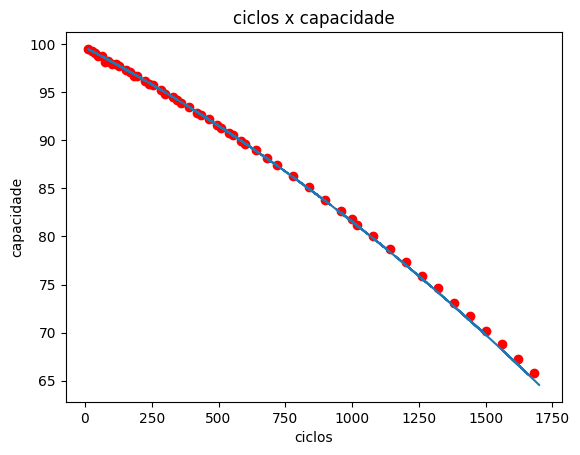

In [102]:
# D

intervalo_temperatura = temperature[(temperature >= 23) & (temperature <= 27)]

ciclos_do_intervalo = cycle[(temperature >= 23) & (temperature <= 27)]

capacidade_do_intervalo = capacity[(temperature >= 23) & (temperature <= 27)]

plt.plot(ciclos_do_intervalo, f(ciclos_do_intervalo, intervalo_temperatura), 'ro')
plt.xlabel("ciclos")
plt.ylabel("capacidade")
plt.title("ciclos x capacidade")
plt.plot(cycle, f(cycle, 25))
